In [1]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import warnings

C:\Users\litwi\AppData\Local\Temp\ipykernel_14944\231046988.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


# Importing data and processing it

In [2]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
original = data

# Creating data and labels

In [4]:
import random

random_indexes = random.sample(range(len(data)), 20)
train_mask = ~data.index.isin(random_indexes)

data_train = data.copy()
data_train.loc[random_indexes, 'quality'] = np.nan

In [5]:
# Test data
X_test = original.loc[random_indexes, original.columns != 'quality']
y_test = original.loc[random_indexes, 'quality']

# Train data
X_train = data.loc[train_mask, data.columns != 'quality']
y_train = data.loc[train_mask, 'quality']

In [6]:
print(f"Training features: {X_train.shape}, Training target: {y_train.shape}")
print(f"Test features: {X_test.shape}, Test target: {y_test.shape}")

Training features: (1579, 11), Training target: (1579,)
Test features: (20, 11), Test target: (20,)


In [7]:
# Batchessssss

from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Creating deep learning architecture

In [8]:
import torch.nn.functional as F

class net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden1 = nn.Linear(hidden_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, X):

        X = F.relu(self.input_layer(X))
        X = F.relu(self.hidden1(X))
        X = F.relu(self.hidden2(X))
        return self.output_layer(X)
        

# Training phase

In [9]:
model = net(11, 32, 1)
lossfn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=.001)

epochs = 500

losses = torch.zeros(epochs)

for epoch in range(epochs):

    individual_loss = []
    for X,y in train_loader:

        y_pred = model(X)
        loss = lossfn(y, y_pred)

        individual_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses[epoch] = np.mean(individual_loss)

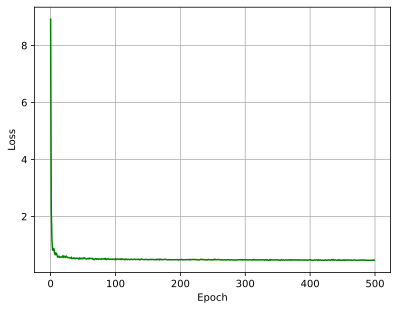

In [10]:
plt.plot(losses, color='green', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
y_predTrain = model(X_train_tensor)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_predTest = model(X_test_tensor)

Text(0, 0.5, 'True')

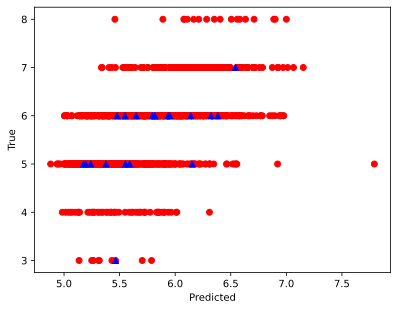

In [12]:
plt.plot(y_predTrain.detach(), y_train, 'ro')
plt.plot(y_predTest.detach(), y_test, 'b^')
plt.xlabel('Predicted')
plt.ylabel("True")